In [1]:
#!pip install foolbox


In [2]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import foolbox as fb
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


2024-12-08 18:02:37.484897: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-08 18:02:37.510220: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733698957.522875  294809 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733698957.526738  294809 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-08 18:02:37.542250: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
@tf.keras.utils.register_keras_serializable(package="Custom")
def focal_loss(alpha=1, gamma=0):
    def focal_loss_fixed(y_true, y_pred):
        # Clip predictions to prevent log(0)
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

        # Compute cross-entropy loss
        ce_loss = - (y_true * K.log(y_pred) + (1 - y_true) * K.log(1 - y_pred))

        # Compute the focal loss scaling factor
        p_t = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        focal_factor = K.pow(1 - p_t, gamma)

        # Compute the focal loss
        focal_loss_value = alpha * focal_factor * ce_loss

        # Return the mean loss over the batch
        return K.mean(focal_loss_value)

    focal_loss_fixed.__name__ = 'focal_loss_fixed'  # Important to set the name for serialization
    return focal_loss_fixed

I0000 00:00:1733698965.450724  294809 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 43482 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:63:00.0, compute capability: 8.6


Evaluating model: best_model_transfer_A_to_D.keras
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


I0000 00:00:1733698967.075203  294809 gpu_device.cc:2022] Created device /device:GPU:0 with 43482 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:63:00.0, compute capability: 8.6
I0000 00:00:1733698967.187281  294809 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-08 18:02:59.581103: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 6.52GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
I0000 00:00:1733699007.281973  294890 service.cc:148] XLA service 0x7f9494015c40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733699007.282019  294890 service.cc:156]   StreamExecutor device (0): NVIDIA A40, Compute Capability 8.6
2024-12-08 18:03:27.292920: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproduc

 1/41 ━━━━━━━━━━━━━━━━━━━━ 2:28 4s/step

2024-12-08 18:03:30.744981: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.
I0000 00:00:1733699010.876196  294890 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step
Classification Report on Adversarial Test Set D:
              precision    recall  f1-score   support

   Uncracked       0.90      0.26      0.41      1160
     Cracked       0.10      0.75      0.17       126

    accuracy                           0.31      1286
   macro avg       0.50      0.50      0.29      1286
weighted avg       0.83      0.31      0.38      1286



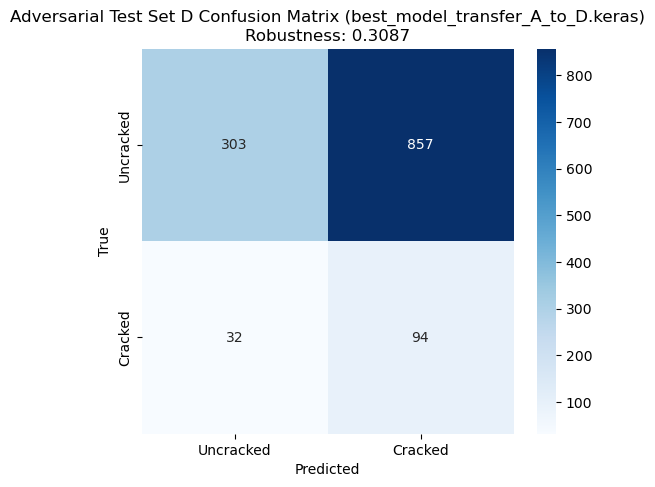



Evaluating model: best_model_transfer_A_to_P.keras


I0000 00:00:1733699013.844414  294809 gpu_device.cc:2022] Created device /device:GPU:0 with 43482 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:63:00.0, compute capability: 8.6


77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step
Classification Report on Adversarial Test Set P:
              precision    recall  f1-score   support

   Uncracked       0.85      0.56      0.68      2173
     Cracked       0.04      0.15      0.06       261

    accuracy                           0.52      2434
   macro avg       0.44      0.36      0.37      2434
weighted avg       0.76      0.52      0.61      2434



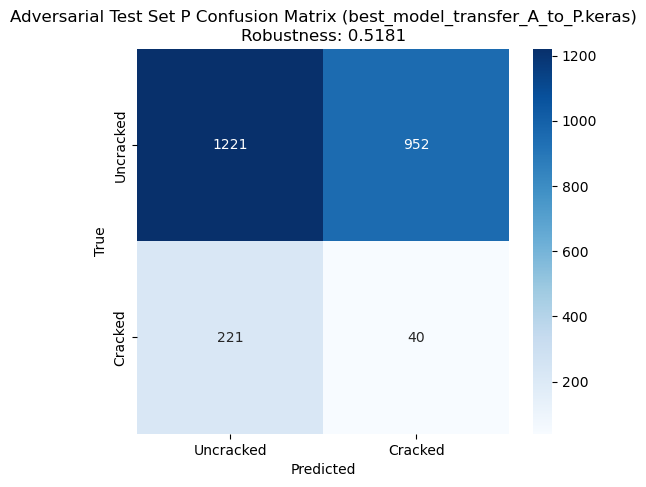



Evaluating model: best_model_transfer_B_to_D.keras


I0000 00:00:1733699051.902976  294809 gpu_device.cc:2022] Created device /device:GPU:0 with 43482 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:63:00.0, compute capability: 8.6


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step
Classification Report on Adversarial Test Set D:
              precision    recall  f1-score   support

   Uncracked       0.85      0.56      0.67      1160
     Cracked       0.02      0.08      0.03       126

    accuracy                           0.51      1286
   macro avg       0.43      0.32      0.35      1286
weighted avg       0.77      0.51      0.61      1286



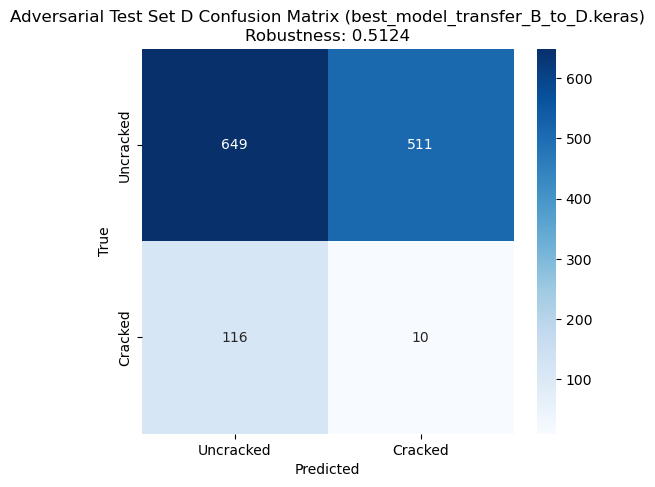



Evaluating model: best_model_transfer_B_to_P.keras


I0000 00:00:1733699071.826459  294809 gpu_device.cc:2022] Created device /device:GPU:0 with 43482 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:63:00.0, compute capability: 8.6


77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step
Classification Report on Adversarial Test Set P:
              precision    recall  f1-score   support

   Uncracked       0.83      0.54      0.66      2173
     Cracked       0.01      0.04      0.02       261

    accuracy                           0.49      2434
   macro avg       0.42      0.29      0.34      2434
weighted avg       0.74      0.49      0.59      2434



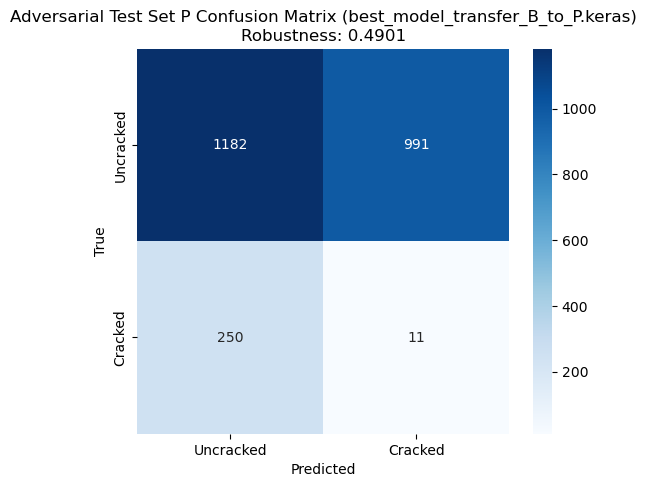



Evaluating model: best_model_transfer_C_to_D.keras


I0000 00:00:1733699109.122238  294809 gpu_device.cc:2022] Created device /device:GPU:0 with 43482 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:63:00.0, compute capability: 8.6


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step
Classification Report on Adversarial Test Set D:
              precision    recall  f1-score   support

   Uncracked       0.73      0.12      0.20      1160
     Cracked       0.07      0.61      0.13       126

    accuracy                           0.16      1286
   macro avg       0.40      0.36      0.16      1286
weighted avg       0.67      0.16      0.19      1286



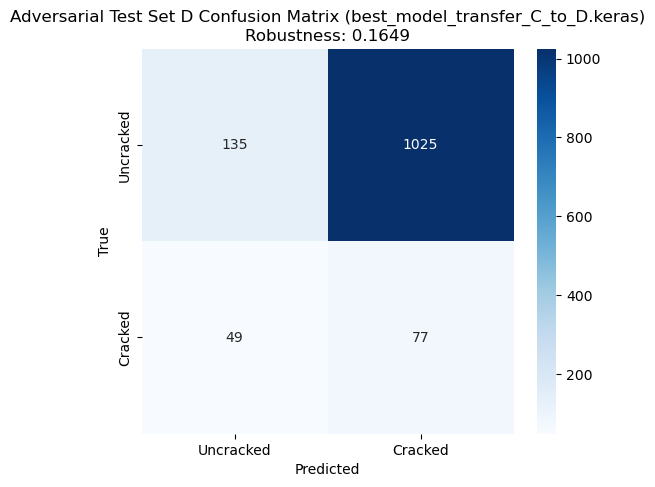



Evaluating model: best_model_transfer_C_to_P.keras


I0000 00:00:1733699129.095511  294809 gpu_device.cc:2022] Created device /device:GPU:0 with 43482 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:63:00.0, compute capability: 8.6


77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step
Classification Report on Adversarial Test Set P:
              precision    recall  f1-score   support

   Uncracked       0.70      0.26      0.38      2173
     Cracked       0.02      0.10      0.03       261

    accuracy                           0.24      2434
   macro avg       0.36      0.18      0.20      2434
weighted avg       0.63      0.24      0.34      2434



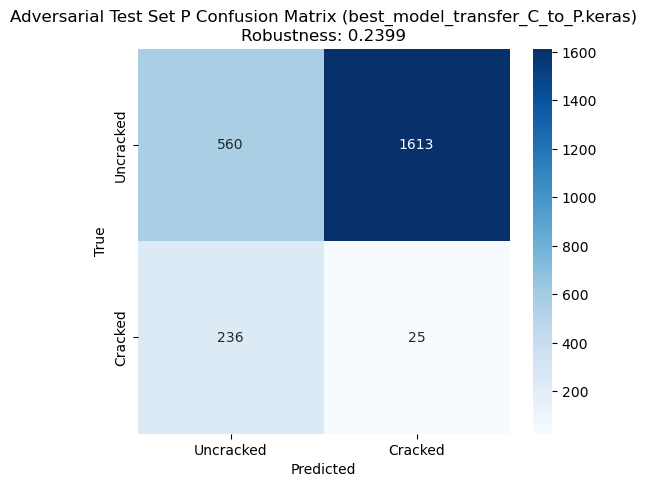

In [4]:
# Paths for pre-saved datasets
test_images_D = np.load('test_set_D_images.npy')
test_labels_D = np.load('test_set_D_labels.npy')
test_images_P = np.load('test_set_P_images.npy')
test_labels_P = np.load('test_set_P_labels.npy')

test_images_D_tensor = tf.convert_to_tensor(test_images_D, dtype=tf.float32)
test_labels_D_tensor = tf.convert_to_tensor(test_labels_D, dtype=tf.int32)
test_images_P_tensor = tf.convert_to_tensor(test_images_P, dtype=tf.float32)
test_labels_P_tensor = tf.convert_to_tensor(test_labels_P, dtype=tf.int32)

bounds = (0, 1)

def evaluate_robustness_and_get_adv_examples(fmodel, images, labels, batch_size=128, epsilon=0.03):
    adv_list = []
    success_list = []
    labels_np = labels.numpy().astype(int)
    labels_tf = tf.convert_to_tensor(labels_np, dtype=tf.int32)

    attack = fb.attacks.FGSM()
    num_samples = len(images)
    for i in range(0, num_samples, batch_size):
        batch_images = images[i : i + batch_size]
        batch_labels = labels_tf[i : i + batch_size]
        
        _, advs, success = attack(fmodel, batch_images, batch_labels, epsilons=epsilon)
        adv_list.append(advs.numpy())
        success_list.append(success.numpy())

    advs_array = np.concatenate(adv_list, axis=0)
    success_array = np.concatenate(success_list, axis=0)
    # Robustness: fraction of samples NOT successfully attacked
    robustness = 1 - np.mean(success_array)
    return advs_array, success_array, labels_np, robustness

def plot_confusion_matrix(y_true, y_pred, robustness, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Uncracked', 'Cracked'], yticklabels=['Uncracked', 'Cracked'])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"{title}\nRobustness: {robustness:.4f}")
    plt.show()

def evaluate_on_adversarial(model, adversarial_images, labels):
    predictions = model.predict(adversarial_images)
    predicted_labels = np.round(predictions).astype(int).flatten()
    report = classification_report(labels, predicted_labels, target_names=['Uncracked', 'Cracked'])
    return predicted_labels, report

model_paths = [
    'best_model_transfer_A_to_D.keras',
    'best_model_transfer_A_to_P.keras',
    'best_model_transfer_B_to_D.keras',
    'best_model_transfer_B_to_P.keras',
    'best_model_transfer_C_to_D.keras',
    'best_model_transfer_C_to_P.keras'
]

for model_path in model_paths:
    print(f"Evaluating model: {model_path}")
    model = tf.keras.models.load_model(
        model_path,
        custom_objects={'focal_loss_fixed': focal_loss(alpha=1, gamma=0)}
    )
    fmodel = fb.TensorFlowModel(lambda x: tf.concat([1 - model(x), model(x)], axis=-1), bounds=bounds)

    # Determine which test set to use based on model_path
    if model_path.endswith("_to_D.keras"):
        test_images_tensor = test_images_D_tensor
        test_labels = test_labels_D
        test_labels_tensor = test_labels_D_tensor
        test_set_name = "Test Set D"
    elif model_path.endswith("_to_P.keras"):
        test_images_tensor = test_images_P_tensor
        test_labels = test_labels_P
        test_labels_tensor = test_labels_P_tensor
        test_set_name = "Test Set P"
    else:
        # If for some reason it doesn't match, skip
        print("Model name does not match expected pattern (_to_D or _to_P). Skipping.")
        continue

    # Get adversarial examples and robustness
    advs_array, success_array, labels_np, robustness = evaluate_robustness_and_get_adv_examples(
        fmodel, test_images_tensor, test_labels_tensor, epsilon=0.03
    )

    # Evaluate only on adversarial examples
    # If you want to filter by successful attacks only, uncomment the following lines:
    # successful_indices = np.where(success_array)[0]
    # advs_array = advs_array[successful_indices]
    # labels_np = labels_np[successful_indices]

    pred_labels_adv, report_adv = evaluate_on_adversarial(model, advs_array, labels_np)
    print(f"Classification Report on Adversarial {test_set_name}:")
    print(report_adv)

    plot_confusion_matrix(labels_np, pred_labels_adv, robustness, 
                          title=f"Adversarial {test_set_name} Confusion Matrix ({model_path})")

    print("\n==============\n")